In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import random
from gcmap import GCMapper, Gradient
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
from mpl_toolkits.basemap import Basemap

In [83]:
# Prints all of dataframe (may take a while)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [84]:
# Read in Data for Domestic Flights
flight_data = pd.read_csv("Domestic_Flights_MarApr2019.csv") 
flight_data.head()

,PASSENGERS,DISTANCE,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,MONTH
0,1,134,"Birmingham, AL",AL,Alabama,"Atlanta, GA",GA,Georgia,Mar
1,1,826,"Birmingham, AL",AL,Alabama,"Harlingen/San Benito, TX",TX,Texas,Mar
2,1,822,"Birmingham, AL",AL,Alabama,"Rochester, NY",NY,New York,Mar
3,2,906,"Birmingham, AL",AL,Alabama,"Midland/Odessa, TX",TX,Texas,Mar
4,2,744,"Birmingham, AL",AL,Alabama,"San Antonio, TX",TX,Texas,Mar


In [85]:
def flights(numberOfPassengers, dailyAvgNOP, totalDailyPassengers, origin_state):
    
    for index, row in flight_data.iterrows():
        
        stateIndex = 0
        while(stateIndex < 100):
            
            state = origin_state[int(stateIndex/2)]
            if((row["ORIGIN_STATE_ABR"] == state or row["DEST_STATE_ABR"] == state) and row["MONTH"] == "Mar"):
                numberOfPassengers[stateIndex] += row["PASSENGERS"]
            stateIndex += 1
            if((row["ORIGIN_STATE_ABR"] == state or row["DEST_STATE_ABR"] == state) and row["MONTH"] == "Apr"):
                numberOfPassengers[stateIndex] += row["PASSENGERS"]
            stateIndex += 1
            
            
    #Average Daily Passengers leaving/entering each state (31 days in March, 30 in April)
    for i in range(len(numberOfPassengers)):
        if (i % 2 == 0):
            dailyAvgNOP[i] = numberOfPassengers[i]/31
        if (i % 2 != 0):
            dailyAvgNOP[i] = numberOfPassengers[i]/30     

    #Total Number of Passengers travelling each day (March and April)
    for i in range(len(numberOfPassengers)):
        if (i % 2 == 0):
            totalDailyPassengers[0] += dailyAvgNOP[i]
        if (i % 2 != 0):
            totalDailyPassengers[1] += dailyAvgNOP[i]  
            
    return(numberOfPassengers, dailyAvgNOP, totalDailyPassengers)

In [107]:
US_Infection = pd.read_csv("us-states.csv")
US_Infection

,Date,State,cases,Population,PercentInfected
0,3/19/20,AL,78,4903185,0.000016
1,3/19/20,AK,12,731545,0.000016
2,3/19/20,AZ,47,7278717,0.000006
3,3/19/20,AR,62,3017804,0.000021
4,3/19/20,CA,1067,39512223,0.000027
5,3/19/20,CO,278,5758736,0.000048
6,3/19/20,CT,159,3565287,0.000045
7,3/19/20,DE,30,973764,0.000031
8,3/19/20,FL,434,21477737,0.000020
9,3/19/20,GA,282,10617423,0.000027


In [109]:
# Drop row for Deleware
US_Infection.drop(US_Infection[US_Infection['State'] == "DE"].index, inplace = True)
US_Infection.reset_index(inplace=True)
US_Infection.drop(['index'], axis=1,inplace=True)
US_Infection

,Date,State,cases,Population,PercentInfected
0,3/19/20,AL,78,4903185,0.000016
1,3/19/20,AK,12,731545,0.000016
2,3/19/20,AZ,47,7278717,0.000006
3,3/19/20,AR,62,3017804,0.000021
4,3/19/20,CA,1067,39512223,0.000027
5,3/19/20,CO,278,5758736,0.000048
6,3/19/20,CT,159,3565287,0.000045
7,3/19/20,FL,434,21477737,0.000020
8,3/19/20,GA,282,10617423,0.000027
9,3/19/20,HI,26,1415872,0.000018


In [87]:
# Using Domestic Flight Data, calculate number of passengers flying between states each day
def detailedFlights(states):
    
    # Dataframes storing daily number of passengers flying between each state
    detailed_flightsMarch = pd.DataFrame(0, index = states, columns = states)
    detailed_flightsApril = pd.DataFrame(0, index = states, columns = states)

    for index, row in flight_data.iterrows():
            for i in range(50):
                if(row["ORIGIN_STATE_ABR"] == states[i] and row["MONTH"] == "Mar"):
                    for j in range(50):
                        if(row["DEST_STATE_ABR"] == states[j]):
                            detailed_flightsMarch.iat[i,j] += row["PASSENGERS"]/31

            for i in range(50):
                if(row["ORIGIN_STATE_ABR"] == states[i] and row["MONTH"] == "Apr"):
                    for j in range(50):
                        if(row["DEST_STATE_ABR"] == states[j]):
                            detailed_flightsApril.iat[i,j] += row["PASSENGERS"]/30
                 
    return(detailed_flightsMarch, detailed_flightsApril)            

In [111]:
def simulation(detailed_flightsMarch, states):

    #Initialize key variables
    percentInfected = US_Infection['PercentInfected']
    state_Populations = US_Infection['Population']
    state_Infections = US_Infection['cases']

    #Store the initial number of infections in eac state
    original_StateInfections = state_Infections    

    #Create a dictionary that will store the infected travelers for each day between March19 and March31
    infectedTravelers_Collection = {} 

    # Infected Travelers = daily passengers flying between each state * percentage of state's population that 
    # is infected
    infectedTravelers = detailed_flightsMarch.multiply(percentInfected.squeeze().values)

    # update number of infected citizens of each state
    for i in range(13):

        #Add the number of infected people leavijng the state from state infections 
        state_Infections = -1*state_Infections.rsub(infectedTravelers.sum(axis=1).squeeze().values)

        #Add the number of infected people entering the state to state infections 
        state_Infections = state_Infections.add(infectedTravelers.sum(axis=0).squeeze().values)  

        percentNotInfected = 1 - (state_Infections/state_Populations)

        # Each person is likely to infect between 2 and 2.5 people
        state_Infections = state_Infections * random.uniform(2.0,2.5) * percentNotInfected


        percentInfected = state_Infections/state_Populations

        infectedTravelers_Collection[i] = pd.DataFrame(infectedTravelers.squeeze().values, index = states, columns = states)
        infectedTravelers = detailed_flightsMarch.multiply(percentInfected.squeeze().values)


    # transform into arrays so that they can later be stored into dataframe
    Original_StateInfections = original_StateInfections.squeeze().values
    state_Infections = state_Infections.squeeze().values

    # initialize and fill indataframe where we will store initial and final infected citizens per state
    original_StateInfectionsDF = pd.DataFrame(0, index = states, columns = ["# of Infected Citizens"])
    state_InfectionsDF = pd.DataFrame(0, index = states, columns = ["# of Infected Citizens"])

    for i in range(49):
        original_StateInfectionsDF.iat[i,0] = original_StateInfections[i]
        state_InfectionsDF.iat[i,0] = state_Infections[i]

    # change in infected citizens over the course of the 13 days
    changeInInfectedCitizens = original_StateInfectionsDF.rsub(state_InfectionsDF)

    changeInInfectedCitizens.columns = ['Change in # of Infected Citizens']
    state_InfectionsDF.columns = ['# of Infected Citizens March 31st']
    original_StateInfectionsDF.columns = ['# of Infected Citizens March 19th']



    return(changeInInfectedCitizens, state_InfectionsDF, original_StateInfectionsDF, infectedTravelers_Collection)


In [89]:
#Read in Data for Stay-at-Home Order Dates+Times
stayAtHome_Dates = pd.read_csv("StayAtHome_Dates.csv") 
stayAtHome_Dates

,States,State_Number,StayAtHome_Date,DaysAfterFirst,Time
0,AL,0,4/4/20,16.0,17.0
1,AK,2,3/28/20,9.0,17.0
2,AZ,4,3/31/20,12.0,17.0
3,AR,6,NaN,NaN,NaN
4,CA,8,3/19/20,0.0,0.0
5,CO,10,3/26/20,7.0,6.0
6,CT,12,3/23/20,4.0,20.0
7,DE,14,3/24/20,5.0,8.0
8,FL,16,4/3/20,15.0,0.0
9,GA,18,4/3/20,15.0,0.0


In [90]:
# Drop row for Deleware
stayAtHome_Dates.drop(stayAtHome_Dates[stayAtHome_Dates['States'] == "DE"].index, inplace = True)
stayAtHome_Dates.reset_index(inplace=True)
stayAtHome_Dates.drop(['index'], axis=1,inplace=True)
stayAtHome_Dates

,States,State_Number,StayAtHome_Date,DaysAfterFirst,Time
0,AL,0,4/4/20,16.0,17.0
1,AK,2,3/28/20,9.0,17.0
2,AZ,4,3/31/20,12.0,17.0
3,AR,6,NaN,NaN,NaN
4,CA,8,3/19/20,0.0,0.0
5,CO,10,3/26/20,7.0,6.0
6,CT,12,3/23/20,4.0,20.0
7,FL,16,4/3/20,15.0,0.0
8,GA,18,4/3/20,15.0,0.0
9,HI,20,3/25/20,6.0,0.0


In [91]:
def effectOnAirlines(dailyAvgNOP_state):

    latestOrder = 0
    for index, row in stayAtHome_Dates.iterrows():
        if(row["DaysAfterFirst"] > latestOrder):
            latestOrder = row["DaysAfterFirst"]
      
    
    lossOfPassengersMarch = np.zeros(13)
    lossOfPassengersApril = np.zeros(int(latestOrder-12))

    totalPassengersLostMarch = 0
    totalPassengersLostApril = 0

    for i in range(int(latestOrder+1)):
            for index, row in stayAtHome_Dates.iterrows():
                if(i <= 12 and row["DaysAfterFirst"] == i):
                    totalPassengersLostMarch += dailyAvgNOP_state[row["State_Number"]]
                    totalPassengersLostApril += dailyAvgNOP_state[row["State_Number"]+1]
                    lossOfPassengersMarch[i] = totalPassengersLostMarch

                if(i > 12 and row["DaysAfterFirst"] == i):
                    totalPassengersLostApril += dailyAvgNOP_state[row["State_Number"]+1]
                    lossOfPassengersApril[i-13] = totalPassengersLostApril
                    
                if (i <= 12):
                    lossOfPassengersMarch[i] = totalPassengersLostMarch

                if (i > 12):
                    lossOfPassengersApril[i-13] = totalPassengersLostApril
                    
    
    return(lossOfPassengersMarch, lossOfPassengersApril)

## Part 1:
### Calculating average daily passengers by state, total daily passengers across the US and total number of passengers by state for the months of March and April

In [92]:
numberOfPassengers_state = np.zeros(100)
dailyAvgNOP_state = np.zeros(100)
totalDailyPassengers = np.zeros(2)
origin_state = flight_data.ORIGIN_STATE_ABR.unique().tolist()
origin_state.sort()
    
numberOfPassengers_state, dailyAvgNOP_state, totalDailyPassengers = flights(numberOfPassengers_state,
                                                                            dailyAvgNOP_state,
                                                                            totalDailyPassengers,
                                                                            origin_state)

## Part 2:
### Estimation of loss of domestic flights as a function of days since the first state, California, released stay-at-home order

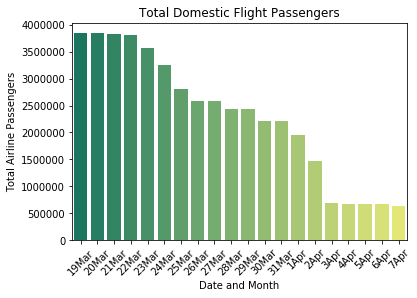

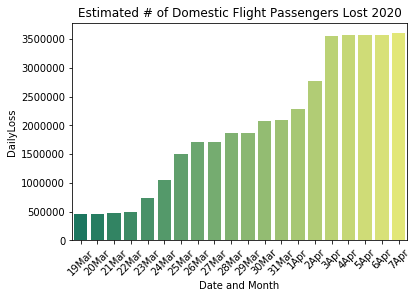

In [141]:
lossOfPassengersMarch, lossOfPassengersApril = effectOnAirlines(dailyAvgNOP_state)
lossOfPassengers = list(lossOfPassengersMarch) + list(lossOfPassengersApril)

totalDailyPassengersMarchCOVID = np.zeros(13)
totalDailyPassengersAprilCOVID = np.zeros(7)

for i in range(13):
    totalDailyPassengersMarchCOVID[i] = totalDailyPassengers[0] - lossOfPassengersMarch[i]
    
for i in range(7):
    totalDailyPassengersAprilCOVID[i] = totalDailyPassengers[1] - lossOfPassengersApril[i]


totalDailyPassengersCOVID = list(totalDailyPassengersMarchCOVID) + list(totalDailyPassengersAprilCOVID)

x = list(range(19,32))
x += list(range(1,8))

data = {'Total Airline Passengers':totalDailyPassengersCOVID,'DailyLoss':lossOfPassengers,'Date': x}

df = pd.DataFrame(data)

df['Month'] = ['Mar' if x >= 19 else 'Apr' for x in df['Date']]
df['Date'] = df['Date'].apply(str)
df['Date and Month'] = df[['Date', 'Month']].apply(lambda x: ''.join(x), axis=1)
plt.title('Total Domestic Flight Passengers')
chart = sns.barplot(x='Date and Month',y='Total Airline Passengers',data=df,palette='summer')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.savefig('TotalDomseticFlightPassengers.png')
plt.show()


plt.title("Estimated # of Domestic Flight Passengers Lost 2020")
chart2 = sns.barplot(x='Date and Month',y='DailyLoss',data=df,palette='summer')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.savefig('Estimated#ofDomesticFlightPassengersLost.png')
plt.show()


## Part 3:
### Dataframe of daily number of passengers travelling between each of the 50 states (March and April)

In [94]:
detailed_flightsMarch, detailed_flightsApril = detailedFlights(origin_state)

In [95]:
detailed_flightsMarch

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,6367,0,0,98,145,134,0,0,0,0,273,0,0,31,0,0,0,0,0,0,0,0,186,0,0,0,0,0,0,0,0,0,0,0,0,0,256,0,0,0,0,0,0,0,0,0,3543,0,0,0
AL,0,0,1,6,8,315,0,0,611,2708,0,0,0,494,0,0,0,0,0,106,0,189,0,3,0,0,780,0,0,0,0,0,125,121,1,0,0,96,0,1,0,7,1841,3,403,0,0,0,0,0
AR,0,0,0,103,111,252,0,0,168,1117,0,0,0,530,0,0,0,0,0,0,0,35,77,199,3,0,382,0,0,0,41,0,154,121,0,0,0,0,0,0,0,3,1975,0,97,0,0,0,0,0
AZ,102,5,95,2081,16698,4717,0,0,2293,2147,1231,832,497,5074,632,201,531,198,614,711,0,1543,3346,1834,0,334,1764,637,844,0,1144,1014,3083,1389,883,604,1723,1639,1,5,349,602,8416,2322,684,0,3756,1120,0,0
CA,137,2,117,17064,64979,12754,68,0,7291,7220,12981,4,1353,12429,700,10,676,1757,4735,2092,1,2708,4297,2905,3,181,3205,0,401,4,6363,1081,17392,10092,1094,294,9593,2984,4,9,4,1786,26078,7843,4522,0,16883,189,0,126
CO,132,317,282,4850,13237,3534,252,0,6044,2955,774,631,732,4550,626,301,859,1060,1183,1112,0,1514,2126,2278,40,1229,1682,703,1008,1,1442,800,3466,2243,1195,1020,1635,1528,3,86,511,1483,11025,2594,2138,0,2718,997,0,644
CT,0,0,0,1,76,239,0,0,2965,841,0,0,0,760,3,0,42,1,0,567,0,373,251,125,0,0,861,0,0,0,0,0,0,0,28,0,1,484,0,56,0,5,280,0,811,0,2,4,0,0
DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FL,0,616,169,2138,7066,5900,3061,0,10766,27330,0,630,0,16363,3667,1,3476,2335,9180,7250,496,10126,6762,4291,187,0,14405,119,334,825,14606,55,2366,27227,5999,150,174,12701,2190,626,93,5230,20408,1103,9269,65,1181,2493,191,0
GA,0,2687,1134,2105,7244,2828,874,0,27441,4426,280,548,0,4053,2057,358,2652,3363,2824,2444,139,3225,2322,3223,1175,119,6477,16,684,129,2292,300,2224,7517,3401,978,543,4103,403,3563,102,4702,9763,1841,7416,116,1345,1727,230,117


In [96]:
detailed_flightsApril

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,6498,0,0,69,125,96,0,0,0,0,142,0,0,127,0,0,0,0,0,0,0,0,131,0,0,0,0,0,0,0,0,0,0,0,0,0,242,0,0,0,0,0,0,0,0,0,3202,0,0,0
AL,0,0,0,0,3,324,0,0,524,2708,0,0,0,499,7,0,0,0,0,89,0,200,4,1,0,0,742,0,0,0,0,4,102,125,0,0,0,98,0,0,0,0,1734,0,397,0,0,0,0,0
AR,0,0,0,83,131,276,0,0,143,1151,0,0,0,623,0,0,0,0,0,0,0,45,82,175,1,0,373,0,0,0,43,0,158,126,0,0,0,0,0,0,0,4,1948,0,111,0,0,0,0,0
AZ,89,1,72,2199,16526,4470,0,0,2057,2037,780,615,469,4570,575,171,469,175,741,703,0,1470,2570,1410,8,268,1589,457,582,0,980,927,2990,1359,788,510,1630,1560,0,0,292,616,8053,2115,683,0,3806,923,0,1
CA,131,2,148,15642,68870,13034,22,0,6760,7374,12854,4,1188,12966,663,2,796,1735,4958,2243,0,2752,4614,2862,0,124,3105,0,352,0,6639,1104,17192,10207,1091,335,10205,3336,6,4,3,1826,25715,7911,4665,0,18487,257,0,0
CO,109,323,272,4310,13169,2974,349,0,4786,2367,864,619,743,3994,700,353,915,1066,1287,1175,0,1607,2094,2412,40,1181,1742,713,1093,1,1252,798,3513,2230,1177,1119,1957,1564,1,101,542,1605,9355,2527,2176,0,3027,1068,0,571
CT,0,3,0,12,10,326,0,0,2999,915,0,0,0,1041,0,0,46,7,3,668,0,417,358,128,0,0,864,0,0,0,0,0,0,12,36,0,3,454,0,93,0,4,243,0,936,0,1,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FL,0,521,141,2003,6872,5042,3154,0,9840,26953,0,356,0,14263,3187,0,3431,2212,9111,7136,550,8715,5056,3268,167,0,13981,95,209,865,13785,53,2328,25751,5659,130,173,11964,1864,662,76,4644,19007,1056,9113,55,1211,1677,219,0
GA,0,2668,1134,1945,7412,2364,918,0,25054,4893,243,585,0,4449,2093,358,2676,3482,2902,2583,140,3311,2285,3148,1150,0,6626,0,638,127,2354,323,2145,7514,3423,967,480,4291,417,3576,98,4683,9780,1504,7769,108,1480,1823,242,0


In [97]:
columns = ['Airport Name', 'City', 'State', 'Latitude', 'Longitude']
airports = pd.read_csv('airports.csv', names=columns)
airports

,Airport Name,City,State,Latitude,Longitude
0,Ted Stevens Anchorage International Airport,ANC,AK,61.174400,-149.996002
1,Birmingham-Shuttlesworth International Airport,BHM,AL,33.562901,-86.753502
2,Bill & Hillary Clinton National Airport/Adams ...,LIT,AR,34.729401,-92.224297
3,Phoenix Sky Harbor International Airport,PHX,AZ,33.434299,-112.012001
4,Los Angeles International Airport,LAX,CA,33.942501,-118.407997
5,Denver International Airport,DEN,CO,39.861698,-104.672996
6,Bradley International Airport,BDL,CT,41.938900,-72.683197
7,Orlando International Airport,MCO,FL,28.429399,-81.308998
8,Hartsfield Jackson Atlanta International Airport,ATL,GA,33.636700,-84.428101
9,Daniel K Inouye International Airport,HNL,HI,21.320620,-157.924228


In [98]:
columns = ['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'nb_passengers']
index = range(1,2450)
origin_state = flight_data.ORIGIN_STATE_ABR.unique().tolist()
origin_state.sort()
origin_state.pop(7)

map_visualization = pd.DataFrame(0.0, index = index, columns = columns)

In [99]:
for i in range (49):
    for j in range(49):
        map_visualization.iat[(i*50)+j,0] = float(airports['Latitude'][i])
        map_visualization.iat[(i*50)+j,1] = airports['Longitude'][i]
        map_visualization.iat[(i*50)+j,2] = airports['Latitude'][j]
        map_visualization.iat[(i*50)+j,3] = airports['Longitude'][j]
        map_visualization.iat[(i*50)+j,4] = detailed_flightsMarch.iat[i,j]
    
map_visualization

,dep_lat,dep_lon,arr_lat,arr_lon,nb_passengers
1,61.174400,-149.996002,61.174400,-149.996002,6367.0
2,61.174400,-149.996002,33.562901,-86.753502,0.0
3,61.174400,-149.996002,34.729401,-92.224297,0.0
4,61.174400,-149.996002,33.434299,-112.012001,98.0
5,61.174400,-149.996002,33.942501,-118.407997,145.0
6,61.174400,-149.996002,39.861698,-104.672996,134.0
7,61.174400,-149.996002,41.938900,-72.683197,0.0
8,61.174400,-149.996002,28.429399,-81.308998,0.0
9,61.174400,-149.996002,33.636700,-84.428101,0.0
10,61.174400,-149.996002,21.320620,-157.924228,0.0


In [139]:
# create gradient to color the routes according to the number of flights
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))
# initialize GCMapper and set data
gcm = GCMapper(cols=grad, height=2000, width=4000)
gcm.set_data(map_visualization['dep_lon'], map_visualization['dep_lat'], map_visualization['arr_lon'],
             map_visualization['arr_lat'], map_visualization['nb_passengers'])

img = gcm.draw()
img.save('flights_map_gcmap.png')

order_State = []

for i in range(49):                    
    for index, row in stayAtHome_Dates.iterrows():
        if(row["DaysAfterFirst"] == i):
            order_State.append(row["States"]) 
            
order_Latitude = []
for i in range(len(order_State)):
    for index, row in airports.iterrows():
        if(row["State"] == order_State[i]):
            order_Latitude.append(row["Latitude"])

df_filtered = map_visualization

for i in range(len(order_Latitude)):
    df_filteredTemp = df_filtered[df_filtered['dep_lat'] != order_Latitude[i]]
    df_filteredTemp2 = df_filteredTemp[df_filteredTemp['arr_lat'] != order_Latitude[i]]
    df_filtered = df_filteredTemp2
    # create gradient to color the routes according to the number of flights
    grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))
    # initialize GCMapper and set data
    gcm = GCMapper(cols=grad, height=2000, width=4000)
    gcm.set_data(df_filtered['dep_lon'], df_filtered['dep_lat'], df_filtered['arr_lon'],
             df_filtered['arr_lat'], df_filtered['nb_passengers'])

    img = gcm.draw()
    img.save('flights_map_gcmap' + str(i) + ".png")

## Part 4:
### Spread of the Virus if none of the states had gone on lockdown (March19 - March31)

#### Number of Infections in Each State March 19th

In [105]:
detailed_flightsMarch.drop("DE",axis=0,inplace = True)
detailed_flightsMarch.drop(['DE'],axis=1,inplace = True)
detailed_flightsMarch

,AK,AL,AR,AZ,CA,CO,CT,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,6367,0,0,98,145,134,0,0,0,273,0,0,31,0,0,0,0,0,0,0,0,186,0,0,0,0,0,0,0,0,0,0,0,0,0,256,0,0,0,0,0,0,0,0,0,3543,0,0,0
AL,0,0,1,6,8,315,0,611,2708,0,0,0,494,0,0,0,0,0,106,0,189,0,3,0,0,780,0,0,0,0,0,125,121,1,0,0,96,0,1,0,7,1841,3,403,0,0,0,0,0
AR,0,0,0,103,111,252,0,168,1117,0,0,0,530,0,0,0,0,0,0,0,35,77,199,3,0,382,0,0,0,41,0,154,121,0,0,0,0,0,0,0,3,1975,0,97,0,0,0,0,0
AZ,102,5,95,2081,16698,4717,0,2293,2147,1231,832,497,5074,632,201,531,198,614,711,0,1543,3346,1834,0,334,1764,637,844,0,1144,1014,3083,1389,883,604,1723,1639,1,5,349,602,8416,2322,684,0,3756,1120,0,0
CA,137,2,117,17064,64979,12754,68,7291,7220,12981,4,1353,12429,700,10,676,1757,4735,2092,1,2708,4297,2905,3,181,3205,0,401,4,6363,1081,17392,10092,1094,294,9593,2984,4,9,4,1786,26078,7843,4522,0,16883,189,0,126
CO,132,317,282,4850,13237,3534,252,6044,2955,774,631,732,4550,626,301,859,1060,1183,1112,0,1514,2126,2278,40,1229,1682,703,1008,1,1442,800,3466,2243,1195,1020,1635,1528,3,86,511,1483,11025,2594,2138,0,2718,997,0,644
CT,0,0,0,1,76,239,0,2965,841,0,0,0,760,3,0,42,1,0,567,0,373,251,125,0,0,861,0,0,0,0,0,0,0,28,0,1,484,0,56,0,5,280,0,811,0,2,4,0,0
FL,0,616,169,2138,7066,5900,3061,10766,27330,0,630,0,16363,3667,1,3476,2335,9180,7250,496,10126,6762,4291,187,0,14405,119,334,825,14606,55,2366,27227,5999,150,174,12701,2190,626,93,5230,20408,1103,9269,65,1181,2493,191,0
GA,0,2687,1134,2105,7244,2828,874,27441,4426,280,548,0,4053,2057,358,2652,3363,2824,2444,139,3225,2322,3223,1175,119,6477,16,684,129,2292,300,2224,7517,3401,978,543,4103,403,3563,102,4702,9763,1841,7416,116,1345,1727,230,117
HI,294,0,0,1229,12613,746,0,0,304,17941,0,0,728,0,0,0,0,1,0,0,27,293,0,0,0,0,0,0,0,197,0,743,247,0,0,1243,0,0,0,0,0,1430,444,153,0,2919,0,0,0


In [112]:
changeInInfectedCitizens, state_InfectionsDF, original_StateInfectionsDF, infectedTravelers_Collection = simulation(detailed_flightsMarch, origin_state)
original_StateInfectionsDF

,# of Infected Citizens March 19th
AK,78
AL,12
AR,47
AZ,62
CA,1067
CO,278
CT,159
FL,434
GA,282
HI,26


#### Number of Infections in Each State March 31st

In [113]:
state_InfectionsDF

,# of Infected Citizens March 31st
AK,1790050
AL,277619
AR,1459944
AZ,1211909
CA,19213019
CO,3203592
CT,1955830
FL,9300274
GA,5195839
HI,494077


#### Change in Number of Infections in Each State

In [114]:
changeInInfectedCitizens

,Change in # of Infected Citizens
AK,1789972
AL,277607
AR,1459897
AZ,1211847
CA,19211952
CO,3203314
CT,1955671
FL,9299840
GA,5195557
HI,494051


In [115]:
print("Dataframes of Infected Travelers Traveling Between States")
for i in range(13):
    print("March", i+19)
    print(infectedTravelers_Collection[i])
    print("")

Dataframes of Infected Travelers Traveling Between States
March 19
          AK        AL        AR        AZ        CA        CO        CT  \
AK  0.101286  0.000000  0.000000  0.002013  0.003916  0.006469  0.000000   
AL  0.000000  0.000000  0.000006  0.000123  0.000216  0.015206  0.000000   
AR  0.000000  0.000000  0.000000  0.002116  0.002997  0.012165  0.000000   
AZ  0.001623  0.000082  0.000613  0.042754  0.450918  0.227711  0.000000   
CA  0.002179  0.000033  0.000755  0.350575  1.754712  0.615693  0.003033   
CO  0.002100  0.005200  0.001821  0.099642  0.357456  0.170602  0.011238   
CT  0.000000  0.000000  0.000000  0.000021  0.002052  0.011538  0.000000   
FL  0.000000  0.010105  0.001091  0.043925  0.190812  0.284820  0.136510   
GA  0.000000  0.044076  0.007322  0.043247  0.195619  0.136520  0.038978   
HI  0.004677  0.000000  0.000000  0.025249  0.340605  0.036013  0.000000   
IA  0.000000  0.000000  0.000000  0.016066  0.000027  0.029592  0.000000   
ID  0.000000  0.00000

#### Dataframes of Infected Travelers Traveling Between States

In [116]:
for i in range(13):
    print("March", i+19)
    print(infectedTravelers_Collection[i])
    print("")

March 19
          AK        AL        AR        AZ        CA        CO        CT  \
AK  0.101286  0.000000  0.000000  0.002013  0.003916  0.006469  0.000000   
AL  0.000000  0.000000  0.000006  0.000123  0.000216  0.015206  0.000000   
AR  0.000000  0.000000  0.000000  0.002116  0.002997  0.012165  0.000000   
AZ  0.001623  0.000082  0.000613  0.042754  0.450918  0.227711  0.000000   
CA  0.002179  0.000033  0.000755  0.350575  1.754712  0.615693  0.003033   
CO  0.002100  0.005200  0.001821  0.099642  0.357456  0.170602  0.011238   
CT  0.000000  0.000000  0.000000  0.000021  0.002052  0.011538  0.000000   
FL  0.000000  0.010105  0.001091  0.043925  0.190812  0.284820  0.136510   
GA  0.000000  0.044076  0.007322  0.043247  0.195619  0.136520  0.038978   
HI  0.004677  0.000000  0.000000  0.025249  0.340605  0.036013  0.000000   
IA  0.000000  0.000000  0.000000  0.016066  0.000027  0.029592  0.000000   
ID  0.000000  0.000000  0.000000  0.010190  0.037023  0.036930  0.000000   
IL 